In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import ode
from numpy.lib import scimath
%load_ext autoreload
%autoreload 2

In [3]:
#import function to do single simulation
from MeanField.MeanFieldSimulation import single_simulation

In [4]:
N=45000
tf = .05
dt = .1e-4

pulses = [[.01,1e-5,'MW',200000],[.03,1e-5,'MW',200000]]
#pulses = []
pulses1 = []

In [1]:
from FockStateSimulation import main
simulation_params = {
    'total_time': .03, #simulated time (s),
    'mag_time':0.015,
    'dt':0.001e-4, #simulation time step,
    'tauB' : 1e-3,
    'c':36*2*np.pi,
    'n_atoms':40000,
    'plot':False
    }


NameError: name 'np' is not defined

In [61]:
data = main(**simulation_params)

[##################################################]100%
 simulation complete


In [7]:
data1 = single_simulation(N,200,tf,dt,pulses,plot = False,qu1=-5)
data3 = single_simulation(N,200,tf,dt,pulses1,plot = False,qu1=-5)

[##################################################]100% Evolve
Calculation Finished in time: 15.49
[##################################################]100% Evolve
Calculation Finished in time: 10.23


In [10]:
% run CoherentStateChebyshev/spinorf.py
data2 = np.loadtxt('results.txt',skiprows = 18)

[                                                  ] 0%

C:\Users\Administrator\Documents\MySpinorSim\CoherentStateChebyshev\spinorf.py:113: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e,first_n0 = setup_scaled_H(eqz + emw[0],c[0],atom_n,m,n_max)
C:\Users\Administrator\Documents\MySpinorSim\CoherentStateChebyshev\spinorf.py:115: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  state = np.zeros(n_max, dtype = complex)


[##################################################]100%
Calculation Complete
Norm recovered 0.0191252147144
Time for Calculation: 15.196383953094482
File written to: results.txt


C:\Users\Administrator\Documents\MySpinorSim\CoherentStateChebyshev\spinorf.py:153: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e, first_n0 =setup_scaled_H(q,c[interval], atom_n, m,n_max)


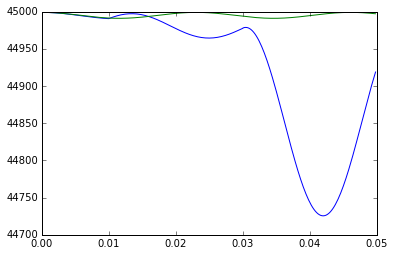

In [8]:
plt.plot(data1[0,:],data1[1,:]*N,label = "mean field")
plt.plot(data3[0,:],data3[1,:]*N,label = "mean field no pulse")

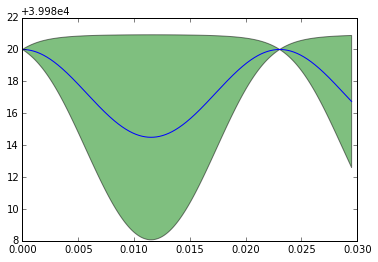

In [62]:
ss=1
m = data[1][:-100]
st = np.sqrt(data[2][:-100])
plt.plot(data[0][:-100],m)
plt.fill_between(data[0][:-100],m-st,m+st,facecolor='green',alpha=0.5)
#plt.plot(data[0][::ss],data[1][::ss])

In [11]:
data

array([[  0.00000000e+00,   1.00000000e-04,   2.00000000e-04, ...,
          4.97000000e-02,   4.98000000e-02,   4.99000000e-02],
       [  5.00000000e+03,   4.99999898e+03,   4.99999591e+03, ...,
          4.99878495e+03,   4.99872216e+03,   4.99865827e+03],
       [  0.00000000e+00,   2.04706192e-03,   8.19927081e-03, ...,
          3.84952752e+00,   4.12749457e+00,   4.41834319e+00]])